In [1]:
# This script does some visualization and adds composite rows

In [2]:
import pandas as pd
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_rows = 999


In [3]:
# Load latest frame (as opposed to the one used in the prior unpack_examine script). This one has multiple yrs

data = pd.read_csv('../data/transformed/kickstarter_hist.csv')


In [4]:
# Check frame

data

,slug,category_lvl1,category_lvl2,country,created_at,deadline,usd_goal,usd_pledged,backers_count,project_url,extract_date,state_defined,goal_ratio_category_lvl1,goal_ratio_category_lvl2,goal_ratio_country
0,project-flint,crafts,printing,US,2016-01-22 04:34:34,2016-02-12 02:31:03,63000.00000,0.000000,0,https://www.kickstarter.com/projects/157647630...,2016-01-28 00:00:00,failed/canceled,6.967916,10.732062,1.703686
1,gaint-surprise,design,product design,GB,2016-01-16 15:15:32,2016-02-18 20:23:13,7137.31045,0.000000,0,https://www.kickstarter.com/projects/130637401...,2016-01-28 00:00:00,failed/canceled,0.260486,0.323656,0.415820
2,the-stakk,design,product design,US,2016-01-03 15:00:18,2016-02-02 18:35:00,5000.00000,0.000000,0,https://www.kickstarter.com/projects/124810776...,2016-01-28 00:00:00,failed/canceled,0.182482,0.226735,0.135213
3,down-syndrome-awareness-bracelets-shirts-hats,design,product design,US,2016-01-22 05:24:22,2016-02-21 05:24:00,1500.00000,0.000000,0,https://www.kickstarter.com/projects/215592288...,2016-01-28 00:00:00,failed/canceled,0.054744,0.068021,0.040564
4,ta-boxes-a-new-electrical-box-to-simplify-snaking,design,product design,US,2016-01-03 14:25:19,2016-03-04 21:07:48,150000.00000,31.000000,2,https://www.kickstarter.com/projects/145298163...,2016-01-28 00:00:00,failed/canceled,5.474449,6.802050,4.056395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184418,woodies-sustainable-stretch-jeans-guaranteed-p...,fashion,NaN,US,2019-06-05 23:29:47,2019-11-07 04:00:00,20000.00000,86286.000000,606,https://www.kickstarter.com/projects/woodiesde...,2019-12-12 00:00:00,successful,1.411404,NaN,0.540853
184419,libro-productividad-inteligente,publishing,academic,MX,2019-03-15 13:56:16,2019-04-08 20:17:44,2082.35720,1.499297,2,https://www.kickstarter.com/projects/israelpal...,2019-12-12 00:00:00,failed/canceled,0.129743,0.101418,0.166869
184420,hikium-shoes,fashion,footwear,NL,2019-05-24 11:21:19,2019-06-23 12:05:18,1115.03852,270.954360,5,https://www.kickstarter.com/projects/ussenter/...,2019-12-12 00:00:00,failed/canceled,0.078689,0.043188,0.043422
184421,giving-hope-to-people-across-the-globe-through...,music,faith,US,2019-03-24 13:36:14,2019-06-20 15:59:00,20000.00000,1045.000000,10,https://www.kickstarter.com/projects/kanthonyl...,2019-12-12 00:00:00,failed/canceled,1.419314,2.033659,0.540853


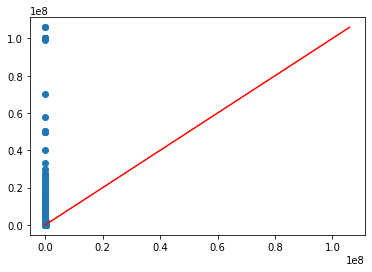

In [5]:
# Check failed/canceled

df=data[data["state_defined"]=="failed/canceled"]

fig, ax = plt.subplots()
ax.scatter(df['usd_pledged'], df['usd_goal'])


# Line with slope 1 from 0 to usd goal max
x_0 = 0
y_0 = 0
x_1 = df["usd_goal"].max()
y_1 = df["usd_goal"].max()
ax.plot([x_0, x_1], [y_0, y_1], c='r')  

plt.show()

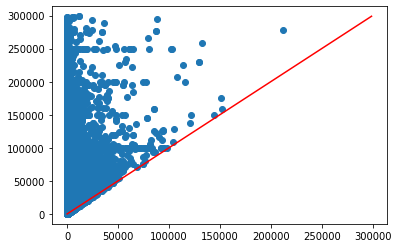

In [6]:
# Apply filters to look at different styles of visualization

# It seems like many projects just have no pledged at all
df = data[data["usd_pledged"] != 0]

# Many outliers
df = df[df["usd_goal"] < 300000]

#Some projects were grouped as failed even thoug they were successful. This was fixed upstream by Paschoal
#df = df[df["usd_goal"] < df["usd_pledged"]]

df = df[df["state_defined"] == "failed/canceled"]

fig, ax = plt.subplots()
ax.scatter(df['usd_pledged'], df['usd_goal'])

# Line with slope 1 from 0 to usd goal max
x_0 = 0
y_0 = 0
x_1 = df["usd_goal"].max()
y_1 = df["usd_goal"].max()
ax.plot([x_0, x_1], [y_0, y_1], c='r')  

plt.show()

In [7]:
data["state_defined"].value_counts()

failed/canceled    103507
successful          80916
Name: state_defined, dtype: int64

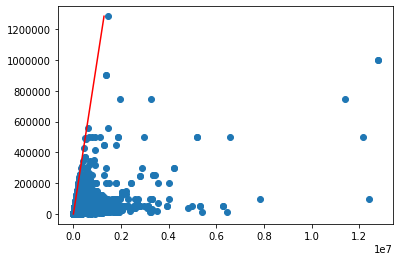

In [8]:
# Check successful in scatter plot

df = data[data["usd_pledged"] != 0]
#df = df[df["usd_goal"] < 300000]
#df = df[df["usd_goal"] < df["usd_pledged"]]
df = df[df["state_defined"] == "successful"]

fig, ax = plt.subplots()
ax.scatter(df['usd_pledged'], df['usd_goal'])

# Line with slope 1 from 0 to usd goal max
x_0 = 0
y_0 = 0
x_1 = df["usd_goal"].max()
y_1 = df["usd_goal"].max()
ax.plot([x_0, x_1], [y_0, y_1], c='r')    

plt.show()

In [9]:
# Add ratio column to see who exceeds the goal and who falls way short of it

data["ratio_reached"] = data["usd_pledged"]/data["usd_goal"]

In [10]:
data["ratio_reached"].describe()

count    184423.000000
mean          5.477478
std         430.300457
min           0.000000
25%           0.010200
50%           0.318889
75%           1.223820
max      155320.390000
Name: ratio_reached, dtype: float64

In [11]:
## Ratio reached by category

data.groupby("category_lvl1").describe()["ratio_reached"]

,count,mean,std,min,25%,50%,75%,max
category_lvl1,,,,,,,,
art,16135.0,2.005549,11.170605,0.0,0.050000,1.009333,1.522824,597.440000
comics,8771.0,7.665177,145.761065,0.0,0.364600,1.162786,1.842708,6483.000000
crafts,4745.0,1.208525,4.500682,0.0,0.004437,0.096250,1.112840,91.702000
dance,1300.0,0.743659,0.659762,0.0,0.051460,1.009167,1.094711,8.310050
design,18039.0,3.332335,14.684485,0.0,0.061357,0.901100,1.975513,926.567010
fashion,15946.0,2.384756,71.187866,0.0,0.008050,0.192376,1.147732,6226.088750
film & video,20286.0,13.699897,1131.879041,0.0,0.002857,0.165000,1.049308,155320.390000
food,11010.0,1.172468,62.561850,0.0,0.001000,0.034633,1.003200,6558.000000
games,24703.0,8.645380,253.352488,0.0,0.060193,1.046261,2.575370,28468.000000


In [12]:
# By category lvl 2

data.groupby("category_lvl2").describe()["ratio_reached"].sort_values(by="mean",ascending=False)

,count,mean,std,min,25%,50%,75%,max
category_lvl2,,,,,,,,
music videos,474.0,135.567905,1873.013458,0.000000,0.000867,0.105871,1.022624,28688.180000
rock,1470.0,55.976648,1805.182201,0.000000,0.054750,1.007488,1.143335,68764.100000
documentary,3765.0,45.691912,2535.176774,0.000000,0.005000,0.170000,1.048334,155320.390000
r&b,369.0,26.836654,260.869758,0.000000,0.000500,0.028200,1.010342,3086.000000
indie rock,1068.0,23.804361,372.567009,0.000000,0.218214,1.033383,1.172250,8100.510000
gaming hardware,406.0,21.964083,374.825831,0.000000,0.041771,0.594000,2.417070,7548.000000
country & folk,1643.0,17.978286,284.202096,0.000000,0.371167,1.054667,1.198000,5501.660000
graphic novels,2457.0,17.127041,256.006301,0.000000,0.172000,1.097000,1.603750,6483.000000
latin,154.0,15.181916,185.076514,0.000000,0.000150,0.009350,0.225182,2297.000000


In [13]:
# Check category

cat = "music videos"

data[data["category_lvl2"] == cat]

,slug,category_lvl1,category_lvl2,country,created_at,deadline,usd_goal,usd_pledged,backers_count,project_url,extract_date,state_defined,goal_ratio_category_lvl1,goal_ratio_category_lvl2,goal_ratio_country,ratio_reached
29294,do-dat-music-video,film & video,music videos,GB,2016-02-05 17:33:44,2016-02-29 16:52:11,4.350657e+02,435.065718,17,https://www.kickstarter.com/projects/141464944...,2017-03-15 00:00:00,successful,0.004229,0.033053,0.025347,1.000000
29295,sea-offs-present-unfound,film & video,music videos,US,2016-07-23 20:52:11,2016-10-05 01:23:00,1.500000e+03,1538.000000,29,https://www.kickstarter.com/projects/878097672...,2017-03-15 00:00:00,successful,0.014582,0.113960,0.040564,1.025333
29296,masters-music-video-collaboration,film & video,music videos,GB,2016-02-18 13:15:53,2016-03-19 22:13:58,1.143991e+03,1429.989160,29,https://www.kickstarter.com/projects/589735490...,2017-03-15 00:00:00,successful,0.011121,0.086913,0.066649,1.250000
29297,musikvideodreh-im-notel-prinzregent,film & video,music videos,DE,2016-06-07 15:11:15,2016-07-17 18:00:00,4.541305e+02,482.513703,16,https://www.kickstarter.com/projects/832299706...,2017-03-15 00:00:00,successful,0.004415,0.034502,0.006000,1.062500
29298,serafias-new-music-video,film & video,music videos,US,2016-10-01 03:48:55,2016-10-31 04:00:00,5.000000e+02,1400.000000,19,https://www.kickstarter.com/projects/serafia/s...,2017-03-15 00:00:00,successful,0.004861,0.037987,0.013521,2.800000
29299,better-desperate,film & video,music videos,US,2016-04-06 19:53:11,2016-05-07 18:04:26,3.000000e+02,300.000000,5,https://www.kickstarter.com/projects/113310103...,2017-03-15 00:00:00,successful,0.002916,0.022792,0.008113,1.000000
29329,whizz-serenades,film & video,music videos,GB,2016-07-19 12:37:27,2016-09-13 09:46:31,6.595845e+02,113.448532,4,https://www.kickstarter.com/projects/garbubro/...,2017-03-15 00:00:00,failed/canceled,0.006412,0.050111,0.038427,0.172000
29330,the-nap,film & video,music videos,US,2016-02-21 20:08:13,2016-05-06 00:36:36,1.000000e+04,28.000000,2,https://www.kickstarter.com/projects/607591051...,2017-03-15 00:00:00,failed/canceled,0.097215,0.759733,0.270426,0.002800
29331,gene-louis-searchin-for-you-music-video,film & video,music videos,US,2016-03-14 18:05:49,2016-03-30 07:01:00,4.000000e+03,182.000000,8,https://www.kickstarter.com/projects/picoblvde...,2017-03-15 00:00:00,failed/canceled,0.038886,0.303893,0.108171,0.045500
29337,parody-song-music-video,film & video,music videos,US,2016-08-24 01:09:18,2016-10-05 01:35:10,2.500000e+04,2.000000,2,https://www.kickstarter.com/projects/792961273...,2017-03-15 00:00:00,failed/canceled,0.243038,1.899332,0.676066,0.000080


In [14]:
## Add pledged per backer column

data["pledge_per_backer"] = data["usd_pledged"] / data["backers_count"]

In [15]:
data.groupby("category_lvl1").describe()["pledge_per_backer"].sort_values(by="max",ascending=False)

,count,mean,std,min,25%,50%,75%,max
category_lvl1,,,,,,,,
film & video,18077.0,82.572359,142.935230,0.486350,24.110000,55.000000,100.000000,10000.000000
food,9933.0,74.806591,156.431312,0.456354,18.000000,45.000000,90.900000,10000.000000
games,23857.0,53.555167,100.703457,0.508076,22.855615,38.367953,62.839082,10000.000000
technology,17855.0,116.699799,241.578811,0.471178,15.239414,50.640000,124.812245,10000.000000
design,17370.0,119.487781,202.448624,0.507319,33.350880,65.329221,133.906333,7552.878115
art,15209.0,51.912540,85.407232,0.484061,19.137931,33.666667,59.789474,5311.291279
fashion,14566.0,69.730159,109.220362,0.482760,18.962750,36.970549,85.462148,5011.500000
journalism,2094.0,45.663512,99.573442,0.483944,6.687500,26.429989,54.215206,2500.000000
crafts,4314.0,49.399045,87.463031,0.484500,14.109132,30.593851,58.575000,2419.833333


In [16]:
data.groupby("category_lvl1").describe()["pledge_per_backer"].sort_values(by="mean",ascending=False)

,count,mean,std,min,25%,50%,75%,max
category_lvl1,,,,,,,,
design,17370.0,119.487781,202.448624,0.507319,33.350880,65.329221,133.906333,7552.878115
technology,17855.0,116.699799,241.578811,0.471178,15.239414,50.640000,124.812245,10000.000000
film & video,18077.0,82.572359,142.935230,0.486350,24.110000,55.000000,100.000000,10000.000000
dance,1225.0,79.108762,76.664977,0.752548,35.163934,63.875000,100.000000,894.875917
theater,3295.0,76.569410,84.527352,0.565595,32.513690,57.916667,94.211032,2091.408245
food,9933.0,74.806591,156.431312,0.456354,18.000000,45.000000,90.900000,10000.000000
fashion,14566.0,69.730159,109.220362,0.482760,18.962750,36.970549,85.462148,5011.500000
photography,3520.0,63.415437,73.000920,0.471178,22.224773,47.408131,81.950000,1209.488326
music,14312.0,62.800442,69.607178,0.463637,25.832116,50.000000,79.440160,2080.000000


In [17]:
data.columns

Index(['slug', 'category_lvl1', 'category_lvl2', 'country', 'created_at',
       'deadline', 'usd_goal', 'usd_pledged', 'backers_count', 'project_url',
       'extract_date', 'state_defined', 'goal_ratio_category_lvl1',
       'goal_ratio_category_lvl2', 'goal_ratio_country', 'ratio_reached',
       'pledge_per_backer'],
      dtype='object')

In [18]:
# Check per category per country

country_cat = data.groupby(["country", "category_lvl1"]).sum()

In [19]:
country_cat

usd_goal   usd_pledged  backers_count  \
country category_lvl1                                              
AT      art            6.446758e+05  3.484622e+04            733   
        comics         1.251423e+05  2.255520e+05           4426   
        crafts         1.246418e+05  1.048920e+04            127   
        dance          5.318300e+03  1.074297e+02              2   
        design         2.450504e+06  6.175543e+06          32126   
        fashion        7.785593e+05  2.275012e+06          15562   
        film & video   2.460864e+06  3.206951e+05           1803   
        food           1.362868e+06  1.087032e+05            902   
        games          1.784419e+06  1.593149e+06          18571   
        journalism     1.740904e+05  6.668167e+02             27   
        music          6.263239e+05  7.181381e+04            947   
        photography    1.020350e+06  6.623211e+05           5434   
        publishing     4.452864e+05  1.466121e+05           2312   
        technology     1.416058e+07  3.996302e+06          18806   
        theater        7.828283e+04  3.506353e+03             39   
AU      art            2.008961e+07  1.365105e+06          23704   
        comics         7.962137e+05  4.765776e+05          16544   
        crafts         1.232965e+06  1.766239e+05           3317   
        dance          2.731698e+05  1.418359e+05           1111   
        design         1.471508e+07  1.286708e+07         169469   
        fashion        4.567785e+06  2.075788e+06          29502   
        film & video   2.569521e+07  2.628528e+06          32013   
        food           6.707213e+06  5.905374e+05           8237   
        games          1.019299e+07  6.186915e+06         134106   
        journalism     1.019086e+06  9.177789e+04           1464   
        music          1.680587e+06  4.694699e+05           7986   
        photography    1.878236e+06  1.005844e+06          10064   
        publishing     4.830328e+06  2.848105e+06          55102   
        technology     3.925665e+07  8.806363e+06          81435   
        theater        9.903209e+05  1.568015e+05           1642   
BE      art            2.675160e+06  1.208580e+05           1789   
        comics         2.239878e+05  9.941868e+04           1141   
        crafts         3.425367e+05  2.588297e+04            256   
        dance          2.248444e+02  2.282171e+02              6   
        design         2.450449e+06  2.032001e+06           8201   
        fashion        1.300938e+06  3.081789e+05           2648   
        film & video   1.970520e+07  2.285613e+05           1956   
        food           1.771631e+06  1.064451e+05            836   
        games          3.292654e+06  2.325509e+06          37468   
        journalism     3.042033e+05  2.107214e+05           2681   
        music          7.356071e+05  3.882195e+05           6682   
        photography    3.055493e+05  3.737202e+04            529   
        publishing     7.192954e+05  2.948265e+05           6804   
        technology     6.454438e+06  5.248234e+05           3939   
        theater        2.488418e+04  8.879693e+03            108   
CA      art            2.889156e+07  3.749830e+06          61492   
        comics         2.994129e+06  3.536151e+06          88565   
        crafts         1.592618e+06  4.727846e+05           7234   
        dance          3.048752e+05  9.185902e+04            949   
        design         1.903751e+07  2.157521e+07         162120   
        fashion        9.149017e+06  6.905025e+06          74881   
        film & video   2.798010e+07  3.082114e+06          35560   
        food           1.138675e+07  1.953734e+06          24382   
        games          2.275118e+07  2.195909e+07         431835   
        journalism     4.125775e+06  2.363248e+05           4808   
        music          5.561873e+06  2.059474e+06          35565   
        photography    1.573237e+06  4.183809e+05           5992   
        publish

In [20]:
# Check bacon

data[data["category_lvl2"] == "bacon"]

,slug,category_lvl1,category_lvl2,country,created_at,deadline,usd_goal,usd_pledged,backers_count,project_url,extract_date,state_defined,goal_ratio_category_lvl1,goal_ratio_category_lvl2,goal_ratio_country,ratio_reached,pledge_per_backer
27889,foodkracker-inc,food,bacon,US,2016-09-08 08:13:58,2016-10-12 19:19:07,100000.00000,56.000000,3,https://www.kickstarter.com/projects/175624943...,2017-03-15 00:00:00,failed/canceled,2.745541,1.614015,2.704264,0.000560,18.666667
27913,all-organic-beef-and-pork-farm,food,bacon,CA,2016-01-28 20:15:45,2016-03-01 16:42:47,31453.17252,71.484483,1,https://www.kickstarter.com/projects/425944744...,2017-03-15 00:00:00,failed/canceled,0.863560,0.507659,1.556773,0.002273,71.484483
27914,hollys-hog-heaven-cupcake-bakery,food,bacon,US,2016-07-02 04:58:42,2016-08-31 11:48:58,15000.00000,25.000000,1,https://www.kickstarter.com/projects/413319171...,2017-03-15 00:00:00,failed/canceled,0.411831,0.242102,0.405640,0.001667,25.000000
27915,1803-bacon-the-best-damn-bacon-in-the-land,food,bacon,US,2016-04-22 18:22:52,2016-10-10 03:59:00,5000.00000,6645.000000,45,https://www.kickstarter.com/projects/164355992...,2017-03-15 00:00:00,successful,0.137277,0.080701,0.135213,1.329000,147.666667
27921,rebel-bacon-the-worlds-best-candied-bacon,food,bacon,US,2016-10-27 18:16:32,2016-12-29 05:00:00,20000.00000,3386.000000,98,https://www.kickstarter.com/projects/701983002...,2017-03-15 00:00:00,failed/canceled,0.549108,0.322803,0.540853,0.169300,34.551020
27922,marleys-gnarly-canine-cookies,food,bacon,US,2016-11-20 23:18:06,2017-01-08 21:37:00,200000.00000,50.000000,1,https://www.kickstarter.com/projects/149873484...,2017-03-15 00:00:00,failed/canceled,5.491082,3.228030,5.408527,0.000250,50.000000
27923,the-amazing-bacon-apron,food,bacon,US,2016-11-18 23:39:25,2016-12-19 06:01:50,50000.00000,83.000000,2,https://www.kickstarter.com/projects/299493517...,2017-03-15 00:00:00,failed/canceled,1.372771,0.807008,1.352132,0.001660,41.500000
27924,goin-sonoran,food,bacon,US,2016-01-11 21:33:17,2016-09-05 03:27:29,7500.00000,650.000000,5,https://www.kickstarter.com/projects/823273974...,2017-03-15 00:00:00,failed/canceled,0.205916,0.121051,0.202820,0.086667,130.000000
27925,together-we-can-spread-the-love-of-bacon,food,bacon,US,2016-04-07 01:13:29,2016-12-08 03:00:00,7000.00000,1382.000000,27,https://www.kickstarter.com/projects/121801953...,2017-03-15 00:00:00,failed/canceled,0.192188,0.112981,0.189298,0.197429,51.185185
27930,paleo-ranch-grass-fed-beef-jerky-bacon-and-pro...,food,bacon,US,2016-11-28 05:38:45,2017-01-10 06:00:00,100000.00000,75.000000,4,https://www.kickstarter.com/projects/paleoranc...,2017-03-15 00:00:00,failed/canceled,2.745541,1.614015,2.704264,0.000750,18.750000


In [21]:
# Try standard IQR outlier treatment

def outlier_treatment(datacolumn):
    
    sorted(datacolumn) 
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1    
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    
    return lower_range,upper_range, IQR

In [22]:
outlier_treatment(data.usd_goal)

(-18750.0, 35250.0, 13500.0)

In [23]:
outlier_treatment(data.usd_pledged)

(-7827.611259587499, 13206.495331312499, 5258.526647725)

In [24]:
data.usd_goal.describe()

count    1.844230e+05
mean     3.445433e+04
std      8.822500e+05
min      6.436000e-01
25%      1.500000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.059990e+08
Name: usd_goal, dtype: float64

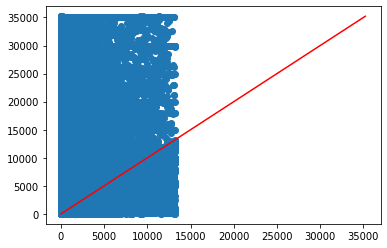

In [25]:
# Use IQR outlier treatment

df = data[data["usd_pledged"] != 0]
df = df[df["usd_goal"] < 35250]
df = df[df["usd_pledged"] < 13206]
#df = df[df["usd_goal"] < df["usd_pledged"]]
#df = df[df["state_defined"] == "failed/canceled"]

fig, ax = plt.subplots()
ax.scatter(df['usd_pledged'], df['usd_goal'])

# Line with slope 1 from 0 to usd goal max
x_0 = 0
y_0 = 0
x_1 = df["usd_goal"].max()
y_1 = df["usd_goal"].max()
ax.plot([x_0, x_1], [y_0, y_1], c='r')    

plt.show()